<a href="https://colab.research.google.com/github/marioruizgonzalez/ml-easy-exersices/blob/main/Keras_NMIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.2'

In [ ]:
keras.__version__

'2.8.0'

In [ ]:
fashion_mnist =keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[2]]

'Sneaker'

In [ ]:
model = keras.models.Sequential()

In [ ]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [ ]:
model.add(keras.layers.Dense(300,activation="relu"))

In [ ]:
model.add(keras.layers.Dense(100,activation="relu"))

In [ ]:
model.add(keras.layers.Dense(10,activation="softmax"))

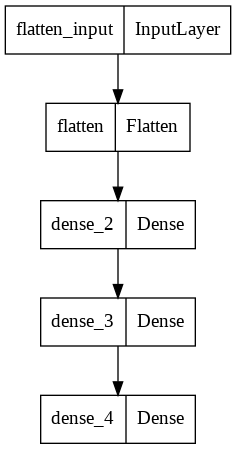

In [ ]:
keras.utils.plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               235500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7176 - accuracy: 0.7655 - val_loss: 0.5720 - val_accuracy: 0.8002
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4876 - accuracy: 0.8295 - val_loss: 0.4455 - val_accuracy: 0.8466
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8454 - val_loss: 0.4201 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4136 - accuracy: 0.8553 - val_loss: 0.3970 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3950 - accuracy: 0.8616 - val_loss: 0.4086 - val_accuracy: 0.8590
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3780 - accuracy: 0.8667 - val_loss: 0.3724 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3652 - accuracy: 0.8704 - val_loss: 0.3676 - val_accuracy:

In [ ]:
import pandas as pd 
import matplotlib.pyplot as pl

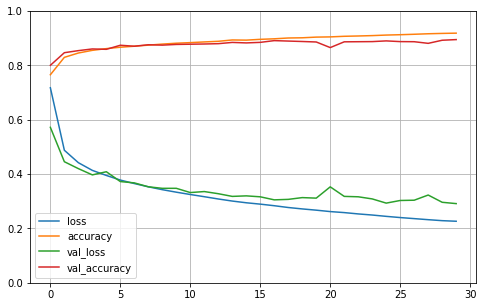

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
pl.grid(True)
pl.gca().set_ylim(0,1)
pl.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.2053 - accuracy: 0.8280


[75.2052993774414, 0.828000009059906]

In [ ]:
X_new = X_test[:3]

In [ ]:
y_proba = model.predict(X_new)

In [ ]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
classes_x=np.argmax(y_proba,axis=1)

In [ ]:
classes_x

array([9, 2, 1])

In [ ]:
np.array(class_names)[classes_x]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')